In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import scipy
from scipy.signal import find_peaks
import pandas as pd

all_data={}
for j in [70,100,150,200]:
    my_array=np.zeros((200,200,20))
    data03=pd.read_csv("D:Desktop/thesis/results/dosetomedium__clear_SFRT_waterphantom"+str(j)+"MeV__1.csv",delimiter= ',',comment='#',names=['x','y','z','dose'])
    for i in np.arange(2,6):
        data1=pd.read_csv("D:Desktop/thesis/results/dosetomedium__clear_SFRT_waterphantom"+str(j)+"MeV__"+str(i)+".csv",delimiter= ',',comment='#',names=['x','y','z','dose'])
        data03.dose=data03.dose + data1.dose
    data03.dose=data03.dose/(1.60218e-19)*(8.2e-9) #*******/5
    for i in np.arange(0,len(data03.x)):
        my_array[data03.x[i]][data03.y[i]][data03.z[i]]=data03.dose[i]
    all_data[j]=np.array(my_array)



In [14]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)


NameError: name 'DOC' is not defined

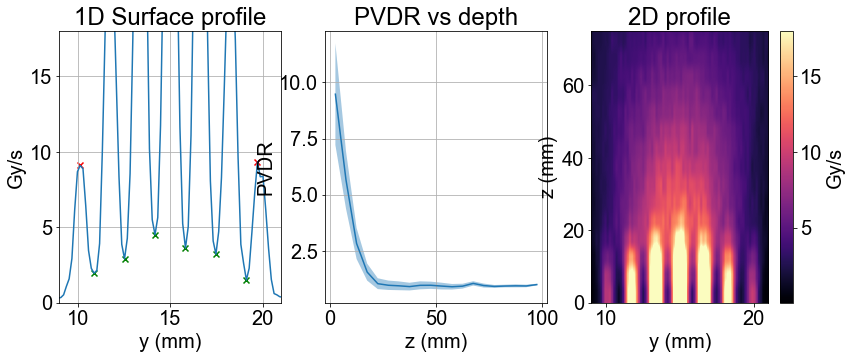

In [15]:

leftedge=int(np.around(9/0.15,0))
rightedge=int(np.around(21/0.15,0))
xslice=99
maxdose=18
zentry=0


y= np.arange(0,200)*0.15+0.15/2
x= np.arange(0,200)*0.15+0.15/2
z= np.arange(0,20)*5+5/2

DOC_energy=[]
pvdr_energy=[]

for i in [70,100,150,200]:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13.5,5))
    im1=ax3.imshow(all_data[i][100].T, aspect='auto',extent=(0,200*0.15,0,20*5),cmap='magma',origin='lower',vmax=maxdose)
    ax3.set_ylabel('z (mm)')
    ax3.set_xlabel('y (mm)')
    ax3.set_xlim((leftedge*0.15,rightedge*0.15))
    ax3.set_ylim((0,75))
    fig.colorbar(im1,label='Gy/s')
    ax3.set_title('2D profile')
    
    
    ax1.plot(y,all_data[i][xslice,:,zentry])
    ax1.set_ylim((0,maxdose))
    ax1.set_xlim((leftedge*0.15,rightedge*0.15))
    ax1.set_ylabel('Gy/s')
    ax1.set_xlabel('y (mm)')
    ax1.grid()
    
    
    peaks= find_peaks(all_data[i][xslice,leftedge:rightedge,zentry],height=maxdose/30,distance=4)[0]
    valleys= find_peaks(-all_data[i][xslice,leftedge:rightedge,zentry],distance=6)[0]
    ax1.scatter(y[leftedge+peaks],all_data[i][xslice,leftedge+peaks,zentry],marker='x',c='red')
    ax1.scatter(y[leftedge+valleys],all_data[i][xslice,leftedge+valleys,zentry],marker='x',c='green')
    ax1.set_title('1D Surface profile')

    pvdr_depth=[]
    mean_peaks=[]
    mean_valleys=[]
    peak_error=[]
    valley_error=[]
    pvdr_error=[]
    for j in np.arange(0,20):
        mean_peaks.append(np.mean(all_data[i][xslice,leftedge+peaks,j]))
        mean_valleys.append(np.mean(all_data[i][xslice,leftedge+valleys,j]))
        peak_error.append(np.std(all_data[i][xslice,leftedge+peaks,j])/np.sqrt(len(all_data[i][xslice,leftedge+peaks,j])))
        valley_error.append(np.std(all_data[i][xslice,leftedge+valleys,j])/np.sqrt(len(all_data[i][xslice,leftedge+valleys,j])))
    pvdr_depth=[mean_peaks[k]/mean_valleys[k] for k in np.arange(0,len(mean_valleys))]
    pvdr_error=np.sqrt((np.array(peak_error)/np.array(mean_peaks))**2+(np.array(valley_error)/np.array(mean_valleys))**2)*pvdr_depth
    n=1
    mean_peaks_avg=[sum(mean_peaks[k:k+n])/n for k in range(0,len(mean_peaks),n)]
    mean_valleys_avg=[sum(mean_valleys[k:k+n])/n for k in range(0,len(mean_valleys),n)]
    pvdr_depth_avg=[mean_peaks_avg[k]/mean_valleys_avg[k] for k in np.arange(0,len(mean_valleys_avg))]
    z_avg=[sum(z[k:k+n])/n for k in range(0,len(z),n)]
    ax2.plot(z_avg,pvdr_depth_avg,label=str(i)+'MV',alpha=1)
    ax2.fill_between(z_avg, pvdr_depth-pvdr_error, pvdr_depth+pvdr_error,alpha=0.4)
    ax2.grid()
    ax2.set_title("PVDR vs depth")
    ax2.set_ylabel('PVDR')
    ax2.set_xlabel('z (mm)')
   # DOC= [w*n for w in np.arange(0,len(pvdr_depth_avg)) if pvdr_depth_avg[w]-pvdr_error[w]<=1.5][0]
    print(z_avg[DOC],i)
    DOC_energy.append(z_avg[DOC])
    pvdr_energy.append(np.max(pvdr_depth_avg))
    ax2.vlines(z_avg[DOC],0,100,colors='red',lw=1)
    ax2.set_ylim(0,50)
    ax2.set_xlim(0,100)
    fig.suptitle(str(i)+' MeV')
    fig.tight_layout()

figure(99,figsize=(8,8))
plt.plot(z,mean_peaks)
plt.plot(z,mean_valleys)



In [ ]:
def align_y_axis(ax1, ax2, minresax1, minresax2,numticks):
    """ Sets tick marks of twinx axes to line up with x total tick marks

    ax1 and ax2 are matplotlib axes
    Spacing between tick marks will be a factor of minresax1 and minresax2"""

    ax1ylims = ax1.get_ybound()
    ax2ylims = ax2.get_ybound()
    ax1factor = minresax1 * (numticks-1)
    ax2factor = minresax2 * (numticks-1)
    ax1.set_yticks(np.linspace(ax1ylims[0],
                               ax1ylims[1]+(ax1factor -
                               (ax1ylims[1]-ax1ylims[0]) % ax1factor) %
                               ax1factor,
                               numticks))
    ax2.set_yticks(np.linspace(ax2ylims[0],
                               ax2ylims[1]+(ax2factor -
                               (ax2ylims[1]-ax2ylims[0]) % ax2factor) %
                               ax2factor,
                               numticks))

energy=np.arange(100,250+1,10)


figure(1,figsize=(8,8))
fig, ax1=plt.subplots(figsize=(8,8))
plt.plot(np.arange(100,250+1,10),DOC_energy,marker='o',label='Depth of convergence',markersize=9,c='tab:orange')
plt.ylabel('Depth of convergence (mm)',c='tab:orange')
plt.xlabel('Energy (MeV)')
plt.grid(c='lightgray',axis='both',ls='--')
plt.ylim(bottom=0)
ax2=ax1.twinx()
#plt.plot(np.arange(100,250,10),pvdr_energy,marker='o',markersize=9,label='PVDR')
#plt.ylabel('PVDR',c='tab:blue')
plt.grid(c='lightgray',axis='both',ls='--')
plt.ylim(bottom=0)
fig.legend(loc="upper center", bbox_to_anchor=(0.5,0.8455))
plt.title('Depth test results (water)')

align_y_axis(ax1,ax2,5,5,6)

[ 2.5  7.5 12.5 17.5 22.5 27.5 32.5 37.5 42.5 47.5 52.5 57.5 62.5 67.5
 72.5 77.5 82.5 87.5 92.5 97.5] [28.000635238833407, 23.47815566599383, 17.309153674119447, 11.58251003182791, 8.30637184063994, 7.594949563115067, 7.100483581341426, 6.524293284570814, 6.316543921310813, 6.011707481289826, 5.456730465983425, 4.900816157394337, 4.479532487748419, 4.2467434979705025, 3.641603521903851, 3.2703974479110967, 2.906167252628619, 2.5253469444052015, 2.3182831209937094, 2.1932388918267103]


Text(0, 0.5, 'PVDR')

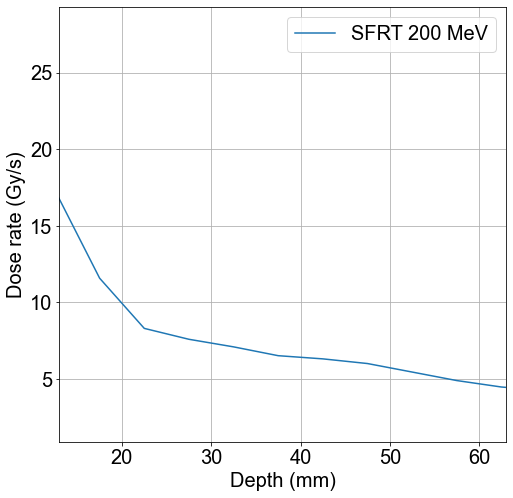

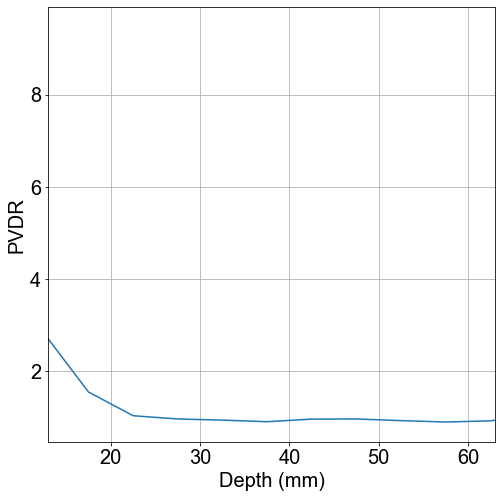

In [16]:
figure(3,figsize=(8,8))
plt.plot(z,mean_peaks_avg,label='SFRT 200 MeV')
plt.grid()
plt.xlim(13,63)
#plt.ylim(0,17)
plt.xlabel('Depth (mm)')
plt.ylabel('Dose rate (Gy/s)')
plt.legend()

print(z,mean_peaks)
scaledown=1
GRID200sim=np.array([z,np.array(mean_peaks)*scaledown,np.array(peak_error)*scaledown,np.array(pvdr_depth),np.array(pvdr_error)])
np.save('D:Desktop/bs/GRID200sim.npy',GRID200sim)
figure(4,figsize=(8,8))
plt.plot(z,pvdr_depth_avg)
plt.grid()
plt.xlim(13,63)
#plt.ylim(0,3.5)
plt.xlabel('Depth (mm)')
plt.ylabel('PVDR')

In [ ]:
figure(100,figsize=(8,8))
plt.imshow(all_data[150].T[0]/2063.6880652516634,cmap='magma',extent=(0,200*0.15,0,200*0.15),origin='lower')
plt.colorbar(shrink=0.75,label='Dose (a.u.)')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.xlim((7.5,22.5))
plt.ylim((7.5,22.5))